# cheat sheet для анализа данных на питоне


## импорты

In [1]:
import numpy as np
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(font_scale=1.6)

Альтернативно можно в `sns.set` добавить `palette='summer'`

## pandas

### создание таблиц

In [14]:
# из двумерного массива
pd.DataFrame(np.random.randn(3, 4), columns=list('ABCD'))

,A,B,C,D
0,1.259330,-1.001876,-0.128936,-0.093203
1,-1.574525,-0.870869,0.911334,0.493068
2,-0.382729,-1.004260,-0.175091,0.238515


In [19]:
pd.DataFrame({
    'A': np.random.randn(3),
    'B': np.random.randn(3),
    'C': np.random.randn(3),
    'D': np.random.randn(3),
})

,A,B,C,D
0,-0.831581,0.622848,-0.039733,0.242867
1,0.199892,0.299659,0.043695,-1.012270
2,-1.312619,-0.760994,1.536352,1.008745


### Полезные функции

In [38]:
df = pd.DataFrame(np.random.randn(3, 4), columns=list('ABCD'))
df

,A,B,C,D
0,-0.265795,-1.472744,0.927901,1.877728
1,0.041289,-1.096281,-0.964495,0.444850
2,-0.580146,0.479639,-1.118225,-0.251120


In [59]:
df.append({
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
}, ignore_index=True)

,A,B,C,D
0,-0.265795,-1.472744,0.927901,1.877728
1,0.041289,-1.096281,-0.964495,0.444850
2,-0.580146,0.479639,-1.118225,-0.251120
3,1.000000,2.000000,3.000000,4.000000


In [39]:
df.head(2)

,A,B,C,D
0,-0.265795,-1.472744,0.927901,1.877728
1,0.041289,-1.096281,-0.964495,0.444850


In [40]:
df.sort_values(by='A')

,A,B,C,D
2,-0.580146,0.479639,-1.118225,-0.251120
0,-0.265795,-1.472744,0.927901,1.877728
1,0.041289,-1.096281,-0.964495,0.444850


In [41]:
df.loc[:1, ['A', 'B']]

,A,B
0,-0.265795,-1.472744
1,0.041289,-1.096281


In [44]:
df.iloc[1, 1]

-1.0962814667408867

In [42]:
df[df.A > df.A.mean()]

,A,B,C,D
0,-0.265795,-1.472744,0.927901,1.877728
1,0.041289,-1.096281,-0.964495,0.444850


In [43]:
df.copy()

,A,B,C,D
0,-0.265795,-1.472744,0.927901,1.877728
1,0.041289,-1.096281,-0.964495,0.444850
2,-0.580146,0.479639,-1.118225,-0.251120


### Обработка пропусков

In [50]:
df_nan = df.copy()
df_nan.iloc[1, 1] = np.NaN
df_nan

,A,B,C,D
0,-0.265795,-1.472744,0.927901,1.877728
1,0.041289,NaN,-0.964495,0.444850
2,-0.580146,0.479639,-1.118225,-0.251120


In [51]:
df_nan.isna()

,A,B,C,D
0,False,False,False,False
1,False,True,False,False
2,False,False,False,False


In [48]:
df_nan.fillna(value=3)

,A,B,C,D
0,-0.265795,-1.472744,0.927901,1.877728
1,0.041289,3.000000,-0.964495,0.444850
2,-0.580146,0.479639,-1.118225,-0.251120


## визуализация данных

In [60]:
grid = np.linspace(start=-1, stop=1, num=100)
data = grid ** 2

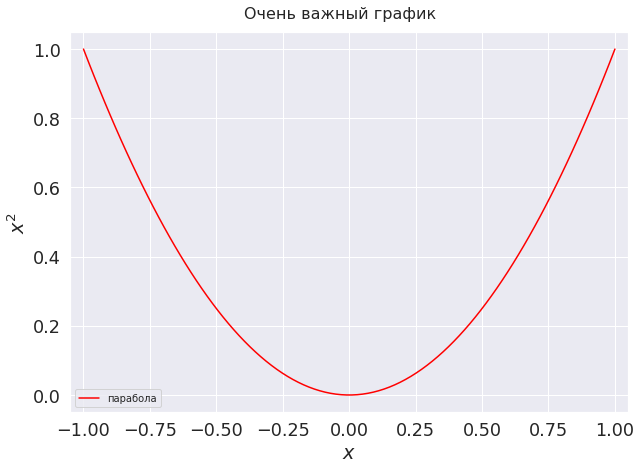

In [84]:
plt.figure(figsize=(10, 7))
sns.lineplot(x=grid, y=data, color='red', label='парабола')
plt.suptitle('Очень важный график', fontsize=16, y=.93)
plt.legend(fontsize=10)
plt.xlim([-1.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('$x$')
plt.ylabel('$x^2$')
plt.show()

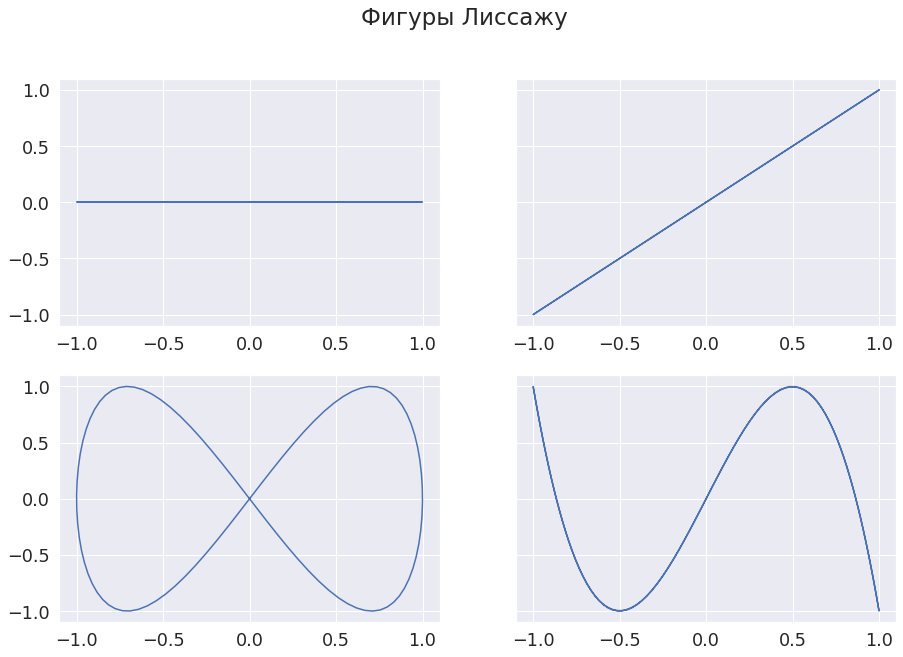

In [107]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
axes = axes.reshape(-1)
fig.suptitle('Фигуры Лиссажу')

for subplot_id, ax in zip(range(len(axes)), axes):
    time = np.linspace(start=0, stop=2 * np.pi, num=100)
    x = np.sin(time)
    y = np.sin(time * subplot_id)
    ax.plot(x, y)